In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing


In [2]:
# do not show user warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# the data is advertising budget that is spent on TV, Radio and Newspaper
# the sales column is the sales that is generated from the advertising budget

df_advertising = pd.read_csv("..\\data\\advertising.csv")
df_advertising.head(10)
df_advertising = df_advertising.head(40)


# Simple Linear Regression Model

In [17]:
# Use only one feature (TV) to train the model
X = df_advertising[['TV']]
y = df_advertising.Sales

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)

print("Data shape", X_train.shape)
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
y_pred_train = lm2.predict(X_train)

# RMSE
print("Train error",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Data shape (20, 1)
Train error 1.5742529731329242
Test error 2.6129279784502835


# Regularization 

In [18]:
from sklearn.linear_model import Ridge, Lasso

# use regularization to reduce overfitting
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train, y_train)
y_pred = ridgeReg.predict(X_test)
# RMSE
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

lassoReg = Lasso(alpha=0.3, fit_intercept=True)
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)
# RMSE
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test error 2.612927684622701
Test error 2.612581158447782


# Polynomial Regression using sklearn library

The sklearn library has a built-in function to create a polynomial feature object. The code in the cell below uses this function to create a polynomial feature object. 


Train error 0.5836243562473882
Test error 121.2236724850387
Train error with regularization 1.3823137264982241
Test error with regularization 4.18334897618108


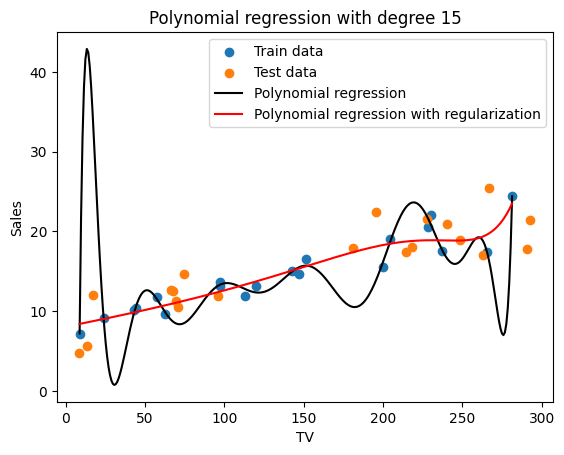

In [19]:
# polynomial regression
scaler = preprocessing.StandardScaler()
degree = 15
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
y_pred_train = polyreg.predict(X_train)

# add regularization to polynomial regression
polyreg_r = make_pipeline(PolynomialFeatures(degree), scaler, Ridge(alpha=0.1))
polyreg_r.fit(X_train, y_train)
y_pred_r = polyreg_r.predict(X_test)
y_pred_train_r = polyreg_r.predict(X_train)
# RMSE
print("Train error", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Train error with regularization", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_r)))
print("Test error with regularization",np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

# plot the results
X = X_train['TV']
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.plot(X_seq, polyreg_r.predict(X_seq), color="red")
plt.xlabel("TV")
plt.ylabel("Sales")
# add legend
plt.legend([ "Train data", "Test data", "Polynomial regression", "Polynomial regression with regularization",])

plt.title("Polynomial regression with degree " + str(degree))
plt.show()

# Polinomial Regression using numpy polyfit

`polyfit()` is a function from the NumPy library that fits a polynomial of a specified degree to a set of training data. It takes two arguments: the x and y coordinates of the training data. The function returns the coefficients of the polynomial, which can be used to predict the target variable for new data points.

The `numpy.poly1d()` function is then used to convert the coefficients of the polynomial into a polynomial object. This object can be used to evaluate the polynomial at any point, which is useful for making predictions on new data.

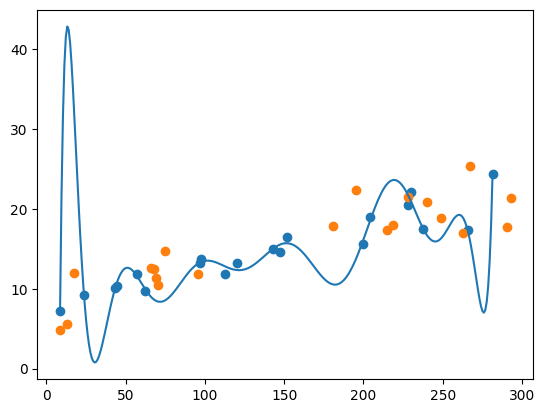

0.5836244659701351
121.21705495179428


In [23]:
import numpy

mymodel = numpy.poly1d(numpy.polyfit(X, y_train, 15))
myline = numpy.linspace(X.min(), X.max(), 300)
plt.scatter(X, y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(myline, mymodel(myline))
plt.show()
y_pred = mymodel(X_test)
y_pred_train = mymodel(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Find the best degree for the polynomial regression model

The code in the cell below computes the RMSE for the training and test sets for polynomials of degrees 1 to 10. The results are plotted.

1 1.574252973132925 2.612927978450284
2 1.5741374490263915 2.604220670888854
3 1.5638056666568174 2.6591053843176096
4 1.563777250543398 2.6533026458708497
5 1.4741292132793913 3.0295671508839925
6 1.3715722031429045 4.0889737443786265
7 1.2143256574647419 6.016448848524259
8 1.1253392737439116 8.130608043807557
9 1.1128514099484461 9.524859363502747


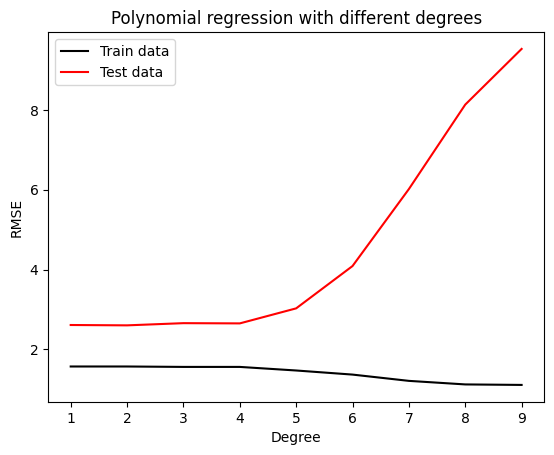

In [24]:
train_l = []
test_l = []
for i in range(1, 10):
    mymodel = numpy.poly1d(numpy.polyfit(X, y_train, i))
    y_pred = mymodel(X_test)
    y_pred_train = mymodel(X_train)
    train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    train_l.append(train)
    test_l.append(test)
    print(i, train, test)
l = numpy.linspace(1, 9, 9)

# show plots on aside another

# plot the lines on one graph
plt.figure()
plt.plot(l, train_l, color="black")
plt.plot(l, test_l, color="red")
plt.xlabel("Degree")
plt.ylabel("RMSE")
# add legend
plt.legend([ "Train data", "Test data",])

plt.title("Polynomial regression with different degrees")

plt.show()

# Create the best polynomial regression model

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ridgeReg = Ridge(alpha=0.1)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, Ridge(alpha=0.01))
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
y_pred_train = polyreg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5741616130153813
2.607867973483131
